In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80

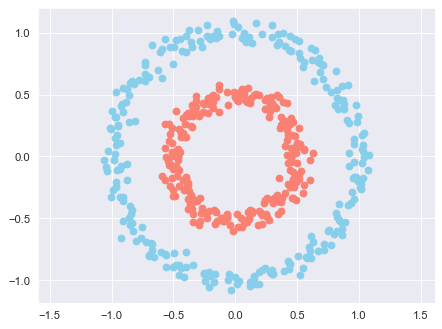

In [3]:
from sklearn.datasets import make_circles

# Crear el dataset
n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

# Visualizar el dataset
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='skyblue')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='salmon')
plt.axis('equal')
plt.show()

In [4]:
# función de activación
def sigmoid(x,derivative=False): 
    if derivative:
        return np.exp(-x)/((1+np.exp(-x))**2)
    else:
        return 1/(1+np.exp(-x))

# función de activación relu
def relu(x,derivative=False):
    if derivative:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)
    
# función de coste mse
def mse(y, y_hat,derivative=False): 
    if derivative:
        return (y_hat - y)
    else:
        return np.mean(np.power(y_hat - y, 2))

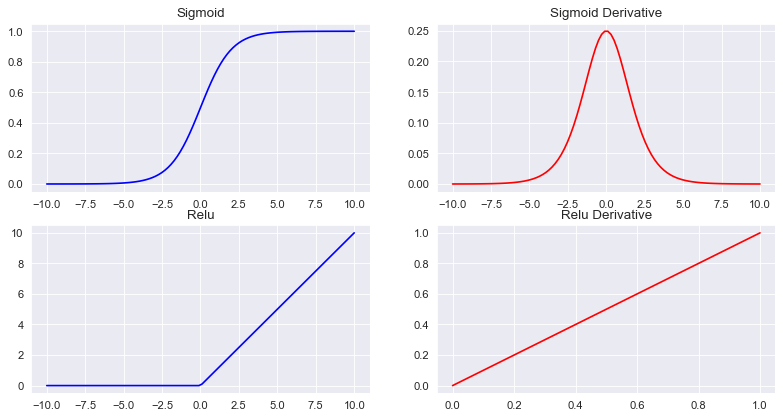

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# plot [sigmoid, derivative]
x = np.linspace(-10, 10, 100)
ax[0][0].plot(x, sigmoid(x), c='blue')
ax[0][0].set_title('Sigmoid')

ax[0][1].plot(x, sigmoid(x, derivative=True), c='red')
ax[0][1].set_title('Sigmoid Derivative')

# plot [relu, derivative]
x = np.linspace(-10, 10, 100)
ax[1][0].plot(x, relu(x), c='blue')
ax[1][0].set_title('Relu')

ax[1][1].plot(x, relu(x, derivative=True), c='red')
ax[1][1].set_title('Relu Derivative')

plt.show()


In [12]:
def init_params(layer_dims):
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    for l in range(0,L-1): # weights initialization
        parameters['W' + str(l+1)] = (np.random.randn(layer_dims[l], layer_dims[l+1])*2 - 1)
        parameters['b' + str(l+1)] = (np.random.randn(1,layer_dims[l+1])*2 -1)
        
    return parameters

layers = [2, 3, 2, 1]
params = init_params(layers)
params

{'W1': array([[ 0.42714686, -1.20507833, -0.05132852],
        [-1.94648564, -0.74773676, -2.91415516]]),
 'b1': array([[ 1.15848044, -0.02836132, -0.62984784]]),
 'W2': array([[ 0.37652395, -3.24674879],
        [-1.59007182, -1.86538192],
        [ 0.45661354, -1.37344175]]),
 'b2': array([[-0.73520416, -2.12073356]]),
 'W3': array([[-1.2066951 ],
        [ 2.79820282]]),
 'b3': array([[-3.76593832]])}

In [13]:
def train(x_data,learning_rate,params,training=True):
    learning_rate = learning_rate
    # Forward propagation
    params['A0'] = x_data

    params['Z1'] = np.dot(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
   

    params['Z2'] = np.dot(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.dot(params['A2'], params['W3']) + params['b3']
    params['A3'] = relu(params['Z3'])
    
    output = params['A3']

    if training:
        # Backward propagation
        # dz3 is the derivative of the cost function with respect to z3 and z3 is the input of the activation function of the output layer
        # paramas['A3'] shape is (1000,1) and Y shape is (1000,1) so dz3 shape is (1000,1)
        # params['dZ3'] shape is (1000,1)
        # params['A2'] shape is (1000,2) and params['dZ3'] shape is (1000,1) so params['dW3'] shape is (2,1) 
        # params['A2'].T shape is (2,1000) 
        # params['dW3'] shape is (2,1)

        params['dZ3'] = mse(Y, output, derivative=True) * sigmoid(params['Z3'], derivative=True)
        params['dW3'] = np.dot(params['A2'].T, params['dZ3']) 

        # params['dZ3'] shape is (1000,1) 
        # params['W3'].T shape is (1,2)
        # params['dZ2'] shape is (1000,2)
        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['Z2'], derivative=True)
        params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['Z1'], derivative=True)
        params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])
        
        # Gradient descent
        
        params['W3'] = params['W3'] - learning_rate * params['dW3']
        params['b3'] = params['b3'] - learning_rate * np.mean(params['dZ3'], axis=0, keepdims=True)

        params['W2'] = params['W2'] - learning_rate * params['dW2']
        params['b2'] = params['b2'] - learning_rate * np.mean(params['dZ2'], axis=0, keepdims=True)

        params['W1'] = params['W1'] - learning_rate * params['dW1']
        params['b1'] = params['b1'] - learning_rate * np.mean(params['dZ1'], axis=0, keepdims=True) 
    return params


0.5
0.5000001495401796
0.5000007449358922
0.5000017149033313
0.5000029867432002
0.5000044995662275
0.5000062027678888
0.5000080546276744
0.500010046159242
0.5000121735053119
0.5000143587713284
0.5000165484588124
0.5000187092885632
0.5000208222979727
0.5000228590540304
0.5000247745779737
0.5000265698910584
0.5000282557701466
0.5000298474345001
0.5000313601457802
0.5000327638686662
0.5000340632481064
0.5000352850308878
0.5000364531460886
0.5000375884569002
0.5000387089256781
0.5000398299566758
0.5000409536326257
0.5000420473797124
0.5000431281941434
0.5000442157195875
0.500045326449075
0.5000464743946087
0.5000476716596021
0.5000489289123661
0.5000502557707179
0.5000516611116178
0.5000531533198159
0.5000547311340154
0.5000563534963799
0.5000580339014393
0.5000597926758361
0.5000616480042241
0.5000636163655863
0.5000656074338778
0.5000675293244758
0.500069443982874
0.5000713430425547
0.4910080314458712
0.47925699079904277
0.4680754124151605
0.4574377279853416
0.4473177613836505
0.43769260

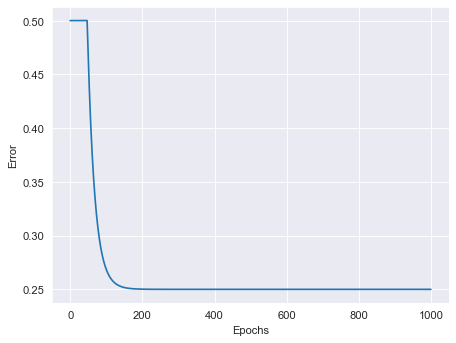

In [14]:
capas = [2,3,2,1]
params = init_params(capas)
error = []
for i in range(10000):
    output = train(X,0.01,params)
    if i % 10 == 0:
        error.append(mse(Y,output['A3']))
        print(mse(Y,output['A3']))
        
# Plot the error over the entire training duration
plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()